PRE-LECTURE QUESTIONS

Question 1)

The "standard error of the mean" refers to the standard deviation of the data set comrprised of all values of the mean after bootstrapping the data.  It describes how far the mean value of each bootstrap is from the mean of all the bootstraps' means, and can be used to determine how reliably the population's mean can be predicted.  Meanwhile, the standard deviation of the original data describes variability (how far each data point is from the mean) of that data set (before bootstrapping the data).  

In other words, standard error of the mean describes how much the sample means vary after bootstrapping the data, while the standard devaiation of the original data describes the spread of the data points in the original set.

Question 2)

The standard error of the mean can be used to create a 95% confidence interval because bootstrapping creates a very large data set of the means of the data after being resampled many times, so we can say with 95% confidence that the true mean value for the entire population falls within 2 standard deviations (which contains 95% of the data for a normal distribution) of the mean of the bootstrapped data.

Question 3)

95% of the data falls between the 2.5th and 97.5th percentiles.  So, by using the np.quantile() function in python, we can include only data that falls between these two percentiles, which is equivalent to the 95% confidence interval.

Question 4)

In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/hannahramirez/BigfootVsUfos/main/bigfoot_mod.csv")
# using the bigfoot data set from last week's homework

def bootstrap_median_ci(data, n_bootstrap=1000, ci=95): #this line defines the function.
    # it sets the number of bootstrap samples taken to 1000, and the confidence interval to 95%, as required.
    # 'data' refers to the column for which we're bootstrapping, in this case, I chose latitude
    
    medians = [] # this line stores the median value of each bootstrap
    for _ in range(n_bootstrap): # sets up loop to bootstrap the data required number of times (1000 in this case)
        sample = np.random.choice(data, size=len(data), replace=True) #randomly selects the correct number of
        # data points for the sample (same number as in original data), and does so WITH REPLACEMENT.
        medians.append(np.median(sample)) # adds the median of each new sample to the line "medians = []" above
    
    lower_percentile = (100 - ci) / 2 #sets the lower percentile needed for the 95% ci (2.5th percentile)
    upper_percentile = 100 - lower_percentile # sets the upper percentile for 95% c.i. (97.5th percentile)
    return np.percentile(medians, [lower_percentile, upper_percentile])
    # this line calculates what median values correspond to the 2.5th and 97.5th percentiles of the bootstrapped data
    # any values between these are part of the 95% confidence interval
    
column_data = df['latitude'].dropna() # this line specifies which column to bootstrap the data for
# in this case, I chose the latitude column.  It also drops any data points with no latitude value, to avoid messing
# up the data.

ci_lower, ci_upper = bootstrap_median_ci(column_data)
# this stores the value of the 2.5th percentile as ci_lower, and the value of the 97.5th percentile as ci_upper

print(f"95% Bootstrap Confidence Interval for the median: [{ci_lower}, {ci_upper}]")
# prints a sentence which contains the lower and upper values of the 95% confidence interval for the median


95% Bootstrap Confidence Interval for the median: [39.11167, 39.51256]


ChatGPT summaries and links for Pre-Lecture Questions:

Question 1 to 3 (same chat: https://chatgpt.com/share/66f75eb1-35d4-800c-9ed4-2c459c05cc6f):

"In this chat, we discussed concepts related to the standard error of the mean (SEM) and bootstrapping in statistics. You sought clarification on how SEM differs from the standard deviation of original data and how SEM can be used to create a confidence interval.

We refined your responses about these concepts, highlighting that:

Standard deviation measures the spread of individual data points in the original dataset, while SEM reflects the variability of the sample mean across different bootstrapped samples.
A 95% confidence interval can be created by adding and subtracting approximately 1.96 times the SEM from the mean of the bootstrapped means.
We also covered an alternative method for creating a 95% bootstrapped confidence interval directly using the bootstrapped means. This involves using the np.quantile() function to find the 2.5th and 97.5th percentiles of the bootstrapped means, which defines the bounds of the confidence interval.

Your understanding of these concepts was clarified and refined throughout the discussion."

Question 4 (link: https://chatgpt.com/share/66f75ee6-8f38-800c-ad58-68c5816ce7d3):

"Here's a summary of our chat:

Bootstrap Confidence Interval: You asked how to produce a 95% bootstrap confidence interval for the median of a dataset loaded from a CSV file.

Code Explanation: I provided a Python code snippet using pandas and numpy, explaining each line in detail, including loading the dataset, defining a function for bootstrapping, and calculating the confidence interval.

Error Encountered: You encountered a KeyError because the placeholder 'column_name' was not replaced with an actual column name in the dataset.

Solution to the Error: I advised you to inspect the DataFrame's columns using print(df.columns) to identify the correct column name and replace 'column_name' in the code accordingly.

If you have any more questions or need further assistance, feel free to ask!"


.

POST-LECTURE QUESTIONS

Question 5)

It's important to distinguish between the population parameter and the sample statistic when dealing with confidence intervals because we cannot know the true population parameter, we can only estimate it using the sample statistic to produce the confidence interval.  Then, we can be fairly certain that the population parameter falls within that interval's range.

Question 6)

Part 1)

Bootstrapping is the process of taking a sample data set (for example, with 100 data points) and drawing many samples from it (for example, 1000), with replacement, meaning that we can select the same data point multiple times in each new sample.  Each of these new samples has the same size as the original sample.  After creating all these new samples from the original data, we (or, more likely, a computer program) calculate the mean, median, or other statistic that we're interested in for all of them, and create a graph displaying the frequency of each value.  This allows us to see what values of that statistic are most common, and calculate their mean, median, etc.

Part 2)

Bootstrapping allows us to only conduct an experiment/collect data once, and then uses that data to simulate what would likely happen if we repeated the experiment many times.  Therefore, it's very useful for saving the time, money, and resources that collecting entire new sets of data or repeating the experiment many times would cost.

Part 3)

To determine if our guess about the population's average was plausible, we would bootstrap the data using the process above for our sample, and then use our computer program to give us the 2.5th and 97.5th percentiles, meaning that 95% of the data falls between these two values.  If the value we guessed falls within that range, then it is a plausible guess, since there is a 95% chance the true population average (which we don't know) falls within this range.  If our guess isn't between the 2.5th and 97.5th percentiles, it is not plausible.

Question 7)

Since we are 95% confident the population parameter falls within the 95% confidence interval, if that interval overlaps with 0, the population parameter could reasonably be equal to 0.  With respect to the example given in the video about the effectiveness of a drug, this means it's plausible that the drug does nothing, as this falls within the confidence interval.  This is true even when the original sample mean is not 0, since by bootstrapping the data, we can simulate a larger number of samples, allowing us to determine a range in which 95% of sample means fall, or the 95% confidence interval.

On the other hand, if 0 does not fall within that 95% confidence interval, we can reject the null hypothesis.  In this case, we would be 95% confident that the population parameter is in the confidence interval, and is therefore not 0 (which is outside the interval).  Thus, we are confident that the drug DOES have an effect.

Question 8)

The null hypothesis in this case would be that the difference between the final and inital scores is 0, indicating that the vaccine has no effect.

In [6]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/Nathan-Morris-123/csv-test/main/patient_health_data-2.csv")

def bootstrap_mean_ci(data, n_bootstrap=1000, ci=95):
    
    means = []
    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=len(data), replace=True)
        means.append(np.mean(sample)) 
    
    lower_percentile = (100 - ci) / 2 
    upper_percentile = 100 - lower_percentile
    return np.percentile(means, [lower_percentile, upper_percentile])
    
column_data = df['Difference'].dropna()

ci_lower, ci_upper = bootstrap_mean_ci(column_data)

print(f"95% Bootstrap Confidence Interval for the median: [{ci_lower}, {ci_upper}]")

95% Bootstrap Confidence Interval for the median: [0.9, 5.5]


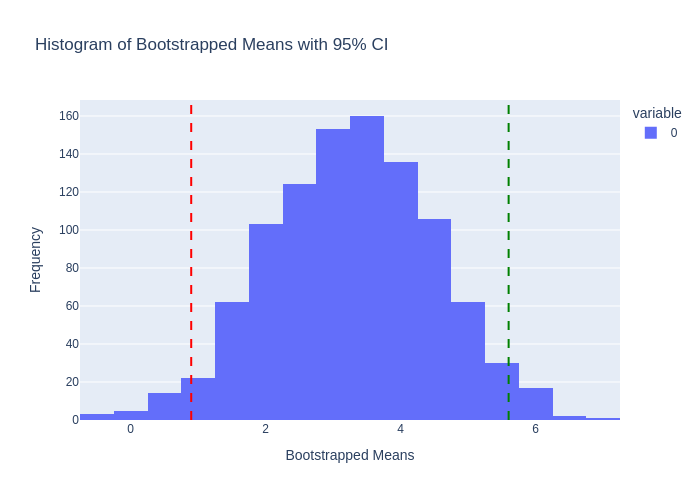

In [5]:
import plotly.graph_objects as go
import plotly.express as px

# Modify the bootstrap function to return the means
def bootstrap_means(data, n_bootstrap=1000):
    means = []
    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=len(data), replace=True)
        means.append(np.mean(sample))
    return means

# Get the bootstrapped means
bootstrapped_means = bootstrap_means(column_data)

# Calculate the confidence interval
ci_lower, ci_upper = np.percentile(bootstrapped_means, [(100 - 95) / 2, 100 - (100 - 95) / 2])

# Create a histogram of the bootstrapped means
fig = px.histogram(bootstrapped_means, nbins=30, title='Histogram of Bootstrapped Means with 95% CI')

# Add vertical lines for the confidence interval
fig.add_vline(x=ci_lower, line=dict(color='red', dash='dash'), name='Lower CI')
fig.add_vline(x=ci_upper, line=dict(color='green', dash='dash'), name='Upper CI')

# Customize the layout for better visibility
fig.update_layout(
    xaxis_title="Bootstrapped Means",
    yaxis_title="Frequency",
    shapes=[
        dict(
            type='line',
            x0=ci_lower,
            y0=0,
            x1=ci_lower,
            y1=1,
            xref='x',
            yref='paper',
            line=dict(color='red', width=2, dash='dash'),
        ),
        dict(
            type='line',
            x0=ci_upper,
            y0=0,
            x1=ci_upper,
            y1=1,
            xref='x',
            yref='paper',
            line=dict(color='green', width=2, dash='dash'),
        )
    ]
)

# Show the plot
fig.show(renderer="png")


This code created this histogram, showing the bootstrapped means of the difference between the initial and final health scores.  It also calculated the 95% confidence interval, with 95% of bootstrap mean values falling between 0.9 and 5.5.  This means we are 95% confident that the populatation parameter for the vaccine's mean (aka. the difference between final and initial health scores if we gave the vaccine to everyone) is between 0.9 and 5.5.

Conclusion:  Since the null hypothesis (that the vaccine has no effect) implies a mean value of 0 for the difference between the final and initial scores, and 0 falls outside of the 95% confidence interval, we can reject the null hypothesis.  In other words, we are confident that the vaccine DOES have an effect.

Question 9)

Somewhat

ChatGPT links and summaries for post-lecture questions

Question 5-7: No ChatGPT used
    
Question 8 (https://chatgpt.com/share/66fb55b5-61bc-800c-9a7d-5b2852a9cd3c):

"In this conversation, you initially provided a dataset and requested it to be converted into a CSV file, which I generated and shared with you. You then encountered a ParserError while attempting to read a CSV file from GitHub, and I explained that the issue was due to using the wrong link format. I recommended using the raw CSV link, which you updated in your code.

Next, you asked to create a histogram of bootstrapped data. I provided code that bootstraps the means of the "Difference" column and displays a histogram with the 95% confidence interval marked with vertical lines."